# **Figure 1.** Dispersions
| Author  | Stanley A. Baronett |
|---------|---------------------|
| Created | 04/24/2022          |
| Updated | 08/08/2022          |

/home/stanley/bitbucket/ccyang/athena-dust/vis/python/athena_read.py:66: AthenaWarning: Multiple headers found; using most recent data
  warnings.warn('Multiple headers found; using most recent data', AthenaWarning)
/home/stanley/bitbucket/ccyang/athena-dust/vis/python/athena_read.py:66: AthenaWarning: Multiple headers found; using most recent data
  warnings.warn('Multiple headers found; using most recent data', AthenaWarning)
/home/stanley/bitbucket/ccyang/athena-dust/vis/python/athena_read.py:66: AthenaWarning: Multiple headers found; using most recent data
  warnings.warn('Multiple headers found; using most recent data', AthenaWarning)
/home/stanley/bitbucket/ccyang/athena-dust/vis/python/athena_read.py:66: AthenaWarning: Multiple headers found; using most recent data
  warnings.warn('Multiple headers found; using most recent data', AthenaWarning)
/home/stanley/bitbucket/ccyang/athena-dust/vis/python/athena_read.py:66: AthenaWarning: Multiple headers found; using most recent data
 

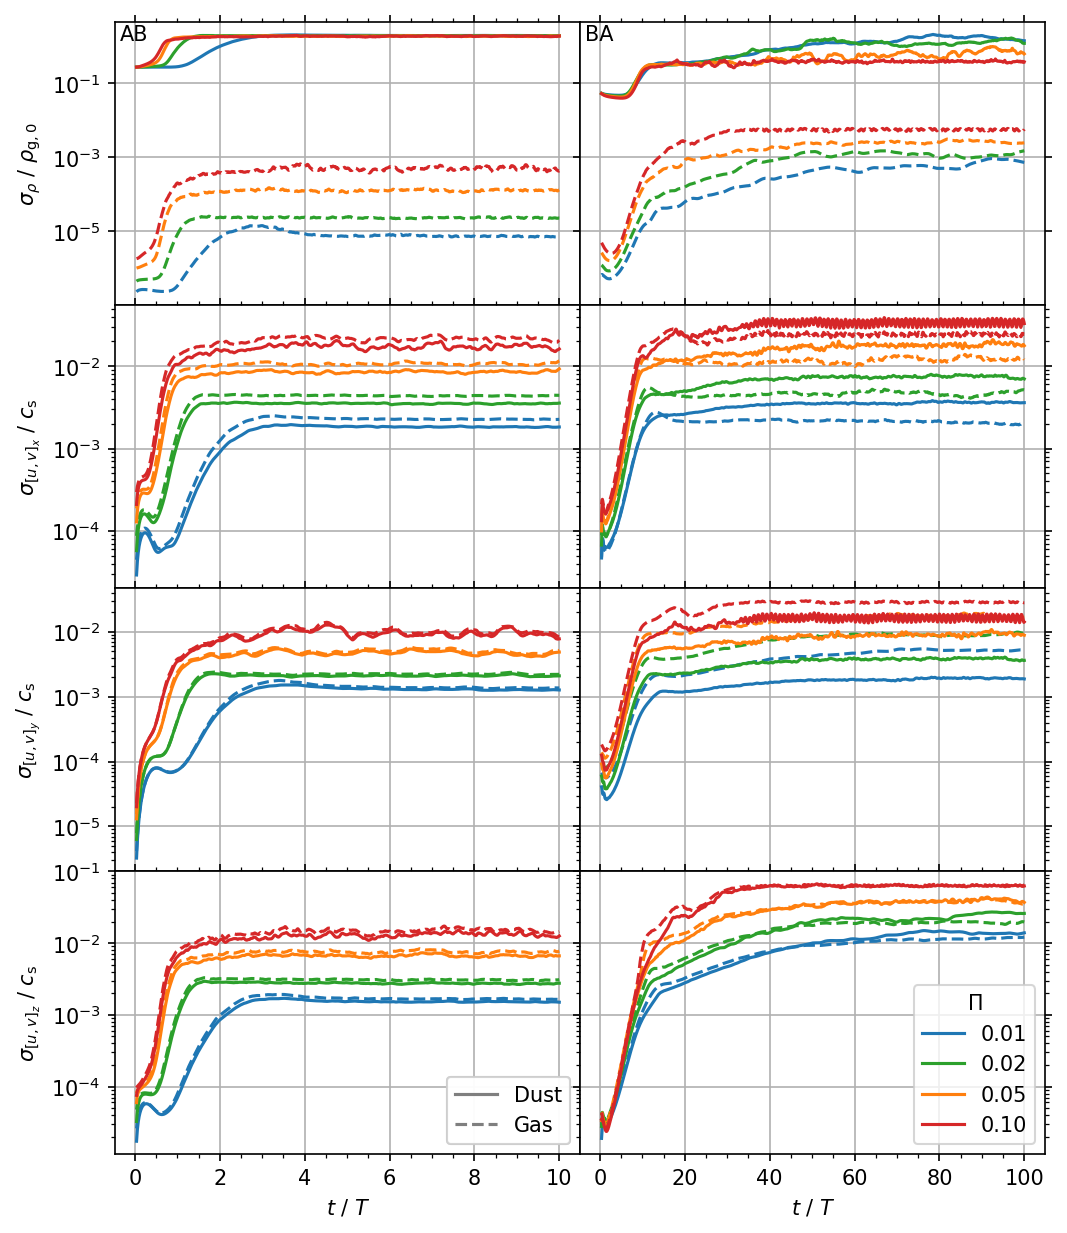

In [1]:
import sys
sys.path.insert(0, '/home/stanley/bitbucket/ccyang/athena-dust/vis/python')
import athena_read
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(4, 2, sharex='col', sharey='row', figsize=(8, 10), dpi=150)
workdir = '../unstrat'
cases = ['AB', 'BA']
Pis = [['0.01', 'tab:blue'], ['0.02', 'tab:green'],
       ['0.05', 'tab:orange'], ['0.10', 'tab:red']]
res = '2048'
psi = 4 # Plot starting index
lns = []

for i, case in enumerate(cases):
    for Pi in Pis:
        # Collect simulation parameters and history file
        athinput = athena_read.athinput(f'{workdir}/{case}/{Pi[0]}/{res}/athinput.si')
        epsilon = athinput['problem']['epsilon']
        c_s = athinput['hydro']['iso_sound_speed']
        Lx = athinput['mesh']['x1max'] - athinput['mesh']['x1min']
        Ly = athinput['mesh']['x2max'] - athinput['mesh']['x2min']
        Lz = athinput['mesh']['x3max'] - athinput['mesh']['x3min']
        Mg = Lx*Ly*Lz
        Mp = epsilon*Mg
        hst = athena_read.hst(f'{workdir}/{case}/{Pi[0]}/{res}/output/SI.hst')

        # Compute dispersions
        sd_rhog = np.sqrt(hst['drhog2'] - (hst['drhog'])**2)
        sd_ux   = np.sqrt(hst['dux2']/Mg - (hst['dux']/Mg)**2)
        sd_uy   = np.sqrt(hst['duy2']/Mg - (hst['duy']/Mg)**2)
        sd_uz   = np.sqrt(2*hst['2-KE']/Mg - (hst['2-mom']/Mg)**2)
        sd_rhop = np.sqrt(hst['drhop2'] - (hst['drhop'])**2)
        sd_vx   = np.sqrt(hst['dvpx2']/Mp - (hst['dvpx']/Mp)**2)
        sd_vy   = np.sqrt(hst['dvpy2']/Mp - (hst['dvpy']/Mp)**2)
        sd_vz   = np.sqrt(hst['dvpz2']/Mp - (hst['dvpz']/Mp)**2)

        # Plot dispersions
        axs[0][i].semilogy(hst['time'][psi:], sd_rhop[psi:], color=Pi[1],
                           label=Pi[0])
        axs[1][i].semilogy(hst['time'][psi:], sd_vx[psi:]/c_s, color=Pi[1],
                           label=Pi[0])
        axs[2][i].semilogy(hst['time'][psi:], sd_vy[psi:]/c_s, color=Pi[1],
                           label=Pi[0])
        ln, = axs[3][i].semilogy(hst['time'][psi:], sd_vz[psi:]/c_s,
                                 color=Pi[1], label=Pi[0])
        lns.append(ln)
        axs[0][i].semilogy(hst['time'][psi:], sd_rhog[psi:],   color=Pi[1],
                           ls='--')
        axs[1][i].semilogy(hst['time'][psi:], sd_ux[psi:]/c_s, color=Pi[1],
                           ls='--')
        axs[2][i].semilogy(hst['time'][psi:], sd_uy[psi:]/c_s, color=Pi[1],
                           ls='--')
        axs[3][i].semilogy(hst['time'][psi:], sd_uz[psi:]/c_s, color=Pi[1],
                           ls='--')

# Plot ghost points for colorless line style legend
ls_dust, = axs[3][0].semilogy([], [], color='tab:gray', label='Dust')
ls_gas,  = axs[3][0].semilogy([], [], color='tab:gray', ls='--', label='Gas')

# Add multiple legends
legend_ls = axs[3, 0].legend(handles=[ls_dust, ls_gas], loc='lower right')
axs[3, 0].add_artist(legend_ls)
axs[3, 1].legend(handles=lns[:4], loc='lower right', title=r'$\Pi$')

# Format subplots
for ax in axs.flat:
    ax.grid()
    ax.minorticks_on()
    ax.tick_params(which='both', top=True, right=True)

axs[0, 0].set(ylabel=r'$\sigma_\rho$ / $\rho_\mathrm{g,0}$')
axs[1, 0].set(ylabel=r'$\sigma_{[u,v]_x}$ / $c_\mathrm{s}$')
axs[2, 0].set(ylabel=r'$\sigma_{[u,v]_y}$ / $c_\mathrm{s}$')
axs[3, 0].set(ylabel=r'$\sigma_{[u,v]_z}$ / $c_\mathrm{s}$')
axs[3, 0].set(xlabel=r'$t$ / $T$')
axs[3, 1].set(xlabel=r'$t$ / $T$')
axs[0, 0].text(0.01, 0.99, 'AB', ha='left', va='top',
               transform=axs[0, 0].transAxes)
axs[0, 1].text(0.01, 0.99, 'BA', ha='left', va='top',
               transform=axs[0, 1].transAxes)

plt.subplots_adjust(hspace=0, wspace=0)
plt.savefig('figs/dispersions.pdf', bbox_inches='tight', pad_inches=0.01)